In [20]:
from PIL import Image as PILImage, ImageDraw
import numpy as np
import pandas as pd
import IPython
from ipywidgets import Image as WImage
from ipywidgets import Box, Label, Layout, VBox
from collections import Counter


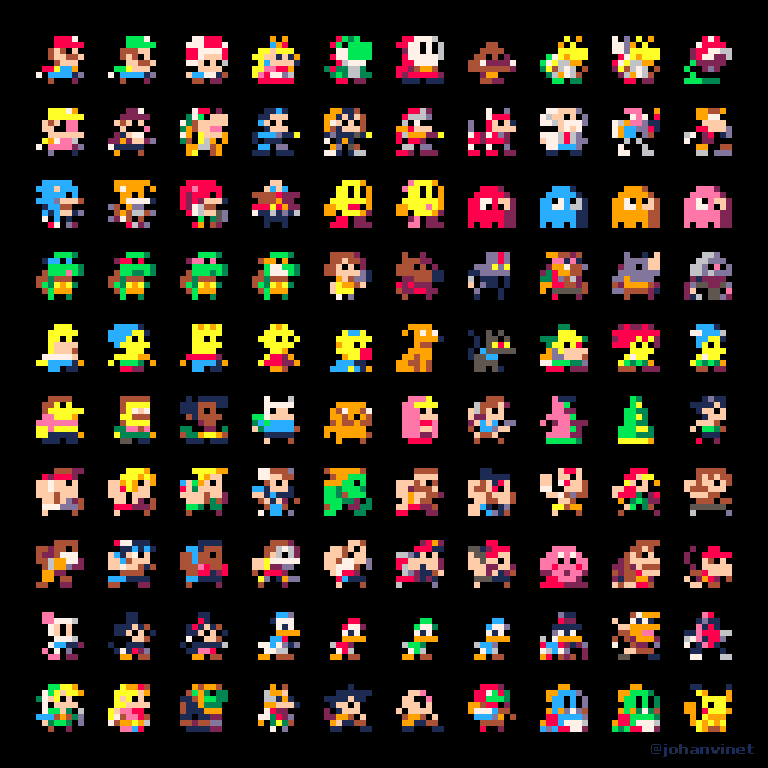

In [21]:
INPUT = './8x8 characters.webp'
OUTPUT_DIR = '/tmp'

in_image = PILImage.open(INPUT)
in_image

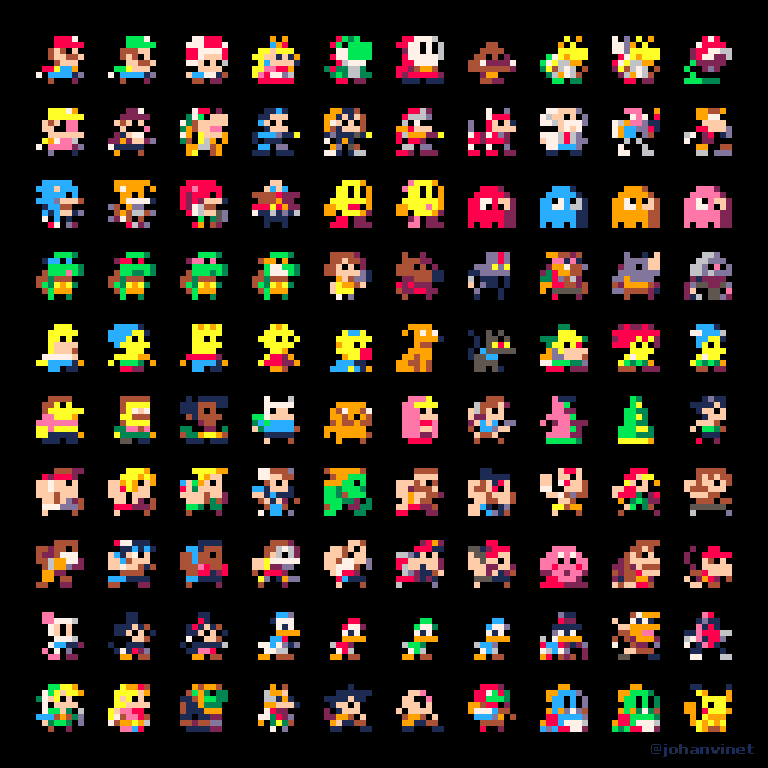

In [5]:
in_image

In [6]:
def mul(a, b):
    return tuple(int(x*y) for x, y in zip(a, b))

In [7]:
def first_non_0_pixel(blank_pixels, axis=0):
    for col in range(blank_pixels.shape[axis]):
        if np.take(blank_pixels, col, axis=axis,).all() == False:
            return col

In [8]:
def find_scale(bt):
    candidates = []
    s = 1
    bt = np.diff(bt, axis=0).any(axis=2)
    for c in range(bt.shape[1]):
        for r in range(bt.shape[0]):
            if bt[r][c]:
                candidates.append(s)
                s = 1
            else:
                s += 1
    candidates.append(s)
    candidates = pd.Series(candidates)
    a = candidates[candidates < candidates.mean() * 2].value_counts()
    a.sort_index().plot(kind='bar', title='continuous pixels')
    import fractions
    return fractions.Fraction(1, a.index[0])

In [9]:
from time import sleep 

In [10]:
def pil2wid(img, width=300, height=300):
    import io
    img_byte_arr = io.BytesIO()
    img.resize((width, height), resample=PILImage.Resampling.NEAREST).save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    return WImage(value=img_byte_arr, format='png', width=width, height=height)

In [11]:
### ARGS:
scale = margin_x = margin_y = None
n_images = 10, 10
interval = 1

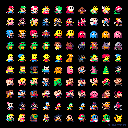

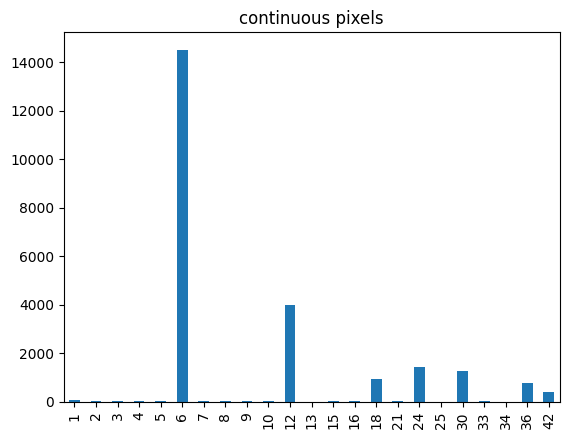

In [12]:
# def get_sub(input, n_images, scale, separation, margin, ingore=None):
#####





#######

img = in_image

bt = np.asarray(img)

if not scale:
    scale = find_scale(bt)
    scale = (scale, scale)
    
new_size = mul(img.size, scale)
assert new_size[0] == new_size[1]
img = img.resize(new_size, PILImage.Resampling.NEAREST)

display(img)


In [13]:
scale = margin_x = margin_y = None
n_images = 10, 10
interval = 4

margin_x=6, margin_y=6


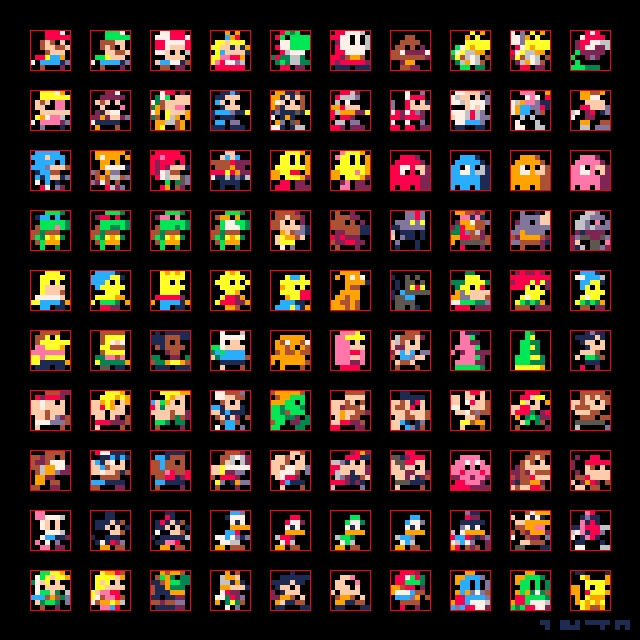

Box(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00d\x00\x00\x00d\x08\x02\x00\x00\x00\…

In [14]:
blank = lambda x: (x == [0,0,0]).all()
blank_pixels = np.apply_along_axis(blank, axis=2, arr=np.asarray(img))

if not margin_x:
    margin_x = first_non_0_pixel(blank_pixels, 0)
if not margin_y:
    margin_y = first_non_0_pixel(blank_pixels, 1)    
    
print(f'{margin_x=}, {margin_y=}') 

# display(IPython.display.HTML('<flexthis></flexthis><style> div.jp-Cell-outputArea:has(flexthis) {display:flex;  flex-wrap: wrap;} </style>'))



CANVAS_SCALE = 5
img_canvas = img.copy().resize((img.size[0]*CANVAS_SCALE, img.size[1]*CANVAS_SCALE), resample=PILImage.Resampling.NEAREST)
img_draw = ImageDraw.Draw(img_canvas)

images = []
for y_ in range(n_images[1]):
    for x_ in range(n_images[0]):
        x = x_*(8 + interval) + margin_x
        y = y_*(8 + interval) + margin_y
        out = img.crop((x, y, x+8, y+8))
        img_draw.rectangle([ (x*CANVAS_SCALE, y*CANVAS_SCALE), ((x+8)*CANVAS_SCALE, (y+8)*CANVAS_SCALE) ], fill = None, outline = "red")
        images.append(out) # )

# Z= cv2.resize(F,(480,380),fx=0, fy=0, interpolation = cv2.INTER_NEAREST)

box = Box([pil2wid(i, 100, 100) for i in images], layout= Layout(display='flex', flex_flow='row wrap',))


display(img_canvas)
display(box)

In [15]:
def post_filter(): pass

In [16]:
box = Box([*[VBox([Label(f'Image {idx}'), pil2wid(i, 100, 100)]) for idx, i in enumerate(images)]
], layout= Layout(display='flex', flex_flow='row wrap',))

display(box)

Box(children=(VBox(children=(Label(value='Image 0'), Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00…

In [17]:
from images_to_C_var import images_to_C_var

print(images_to_C_var(images)[:5000])

NameError: name 'scale' is not defined

In [18]:
from pathlib import Path
output_filename = Path(INPUT).with_suffix('.cpp').name.replace(' ', '_')
assert output_filename.isascii() and output_filename.isprintable(), 'This filename is bad:' + output_filename
output_path = Path(OUTPUT_DIR) / Path(output_filename)
with open(output_path, 'wb') as f:
    f.write(images_to_C_var(images).encode('ascii'))
print(f'Wrote to {output_path} !')

NameError: name 'scale' is not defined